The notebook is clear and organized and easy to follow. I would recommend using a heatmap which can show the correlation to BeatsPerMinutes to help see the strongest predictors for your final model. Possibly add more headings and descriptions.

In [1]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/test-and-training-data/train.csv")

In [3]:
df.head()


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
# Check correlations with the target
correlations = df.corr()['BeatsPerMinute'].sort_values(ascending=False)
print(correlations)

BeatsPerMinute               1.000000
MoodScore                    0.007059
TrackDurationMs              0.006637
RhythmScore                  0.005440
VocalContent                 0.004876
LivePerformanceLikelihood    0.003471
InstrumentalScore            0.001900
id                          -0.000355
AcousticQuality             -0.000820
AudioLoudness               -0.003327
Energy                      -0.004375
Name: BeatsPerMinute, dtype: float64


In [10]:
# Features and target 
# Drop target + id columns
X_raw = df.drop(columns=['BeatsPerMinute', 'id'])
y = df['BeatsPerMinute']

print (X_raw.shape)

(524164, 9)


In [11]:
#Drop low-variance features
selector = VarianceThreshold(threshold=0.01)
X_filtered = pd.DataFrame(
    selector.fit_transform(X_raw),
    columns=X_raw.columns[selector.get_support()]
)
print (X_filtered.shape)

(524164, 8)


In [12]:
# Feature engineering: Convert TrackDurationMs from milliseconds to seconds
if 'TrackDurationMs' in X_raw.columns:
    X_raw['TrackDurationMs'] = X_raw['TrackDurationMs'] / 1000.0
    


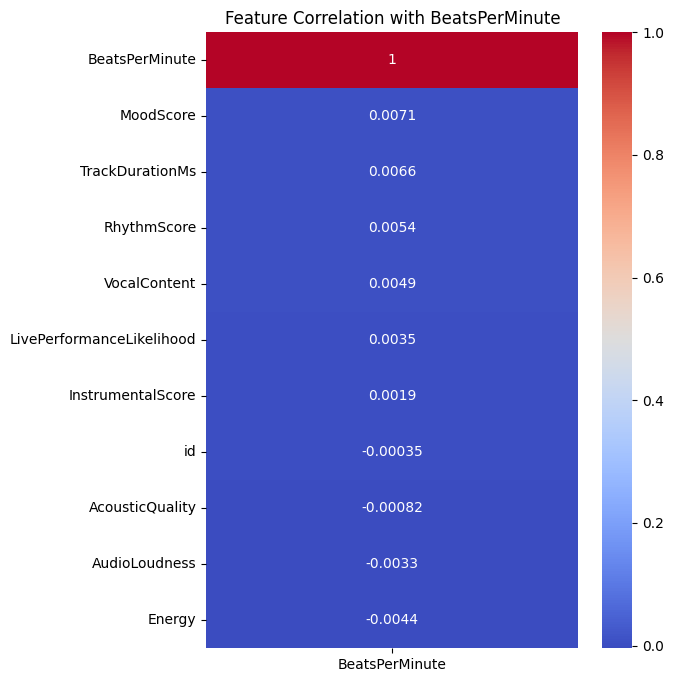

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(6,8))
sns.heatmap(corr[['BeatsPerMinute']].sort_values(by='BeatsPerMinute', ascending=False),
            cmap="coolwarm", annot=True)
plt.title("Feature Correlation with BeatsPerMinute")
plt.show()



In [ ]:
# Train/Test split
X_train, X_val, y_train, y_val = train_test_split(
    X_raw, y, test_size=0.2, random_state=42
)

In [ ]:
# Linear Regression 
lin_reg = make_pipeline(LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_val)
mse_lin = mean_squared_error(y_val, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print("Linear Regression MSE:", mse_lin)
print("Linear Regression RMSE:", rmse_lin)


In [ ]:
# Ridge Regression 
ridge = make_pipeline(StandardScaler(), Ridge(alpha=10))
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

In [ ]:
# Random Forest 
rf = RandomForestRegressor(
    n_estimators=300, max_depth=20, max_features='sqrt',
    random_state=42, n_jobs=2
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print("Random Forest MSE:", mse_rf)

In [ ]:
# Baseline (mean predictor) 
baseline_pred = np.full_like(y_val, y_train.mean())
mse_baseline = mean_squared_error(y_val, baseline_pred)
print("Baseline MSE:", mse_baseline)

In [ ]:
# Linear Regression Plot with RMSE
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred_lin, alpha=0.5, color='orange')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title(f"Linear Regression\nMSE: {rmse_lin:.2f}")
plt.grid(True)
plt.show()

#Plot bpm and overlay best fit(ridge regression)

In [ ]:
# Ridge Regression Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred_ridge, alpha=0.5, color='dodgerblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title(f"Ridge Regression\nMSE: {mse_ridge:.2f}")
plt.grid(True)
plt.show()

In [ ]:
# Random Forest Plot
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title(f"Random Forest\nMSE: {mse_rf:.2f}")
plt.grid(True)
plt.show()
#show prefomance metrics, rmse mse